In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
hp=pd.read_csv('/content/train-chennai-sale.csv')


In [5]:
hp=hp.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

In [6]:
hp.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


In [ ]:
hp.dtypes

In [ ]:
hp.isnull().sum()

# **Distribution plot**

In [ ]:
for fd in hp.columns:
  hpc=hp.copy()
  hpc[fd].hist(bins=25)
  plt.title(fd)
  plt.xlabel(fd)
  plt.ylabel("count")
  plt.show()

# **AREA**

In [9]:
hp['AREA'].isnull().sum()

0

In [10]:
hp['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [11]:
hp['AREA']=hp['AREA'].replace({'Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','Velchery':'Velachery', 'Chrompt':'Chrompet', 'Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','KKNagar':'KK Nagar'}) 

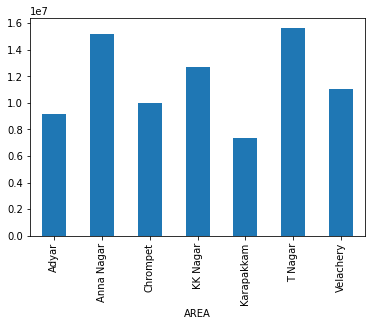

In [12]:
hp.groupby('AREA')['SALES_PRICE'].mean().plot.bar()


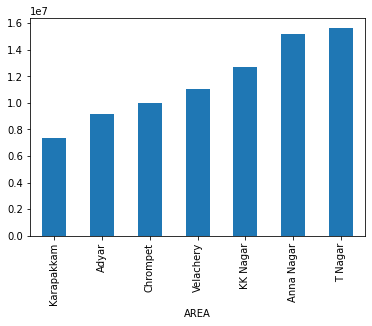

In [14]:
hp.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

In [15]:
hp['AREA']=hp['AREA'].replace({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4, 'Anna Nagar':5,'T Nagar':6})

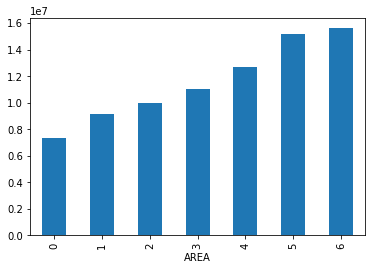

In [16]:
hp.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()


In [17]:
hp.AREA.dtype

dtype('int64')

# **INT_SQFT**

In [20]:
hp.INT_SQFT.values

array([1004, 1986,  909, ..., 1614,  787, 1896])

In [ ]:
hp.plot(['INT_SQFT'])

In [21]:
hp.INT_SQFT.isnull().sum()

0

In [24]:
hp.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [23]:
hp.INT_SQFT.dtype

dtype('int64')

# **DATE_SALE**

In [25]:
hp.DATE_SALE.values

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '25-08-2006',
       '03-08-2009', '13-07-2005'], dtype=object)

In [26]:
hp.DATE_SALE=pd.to_datetime(hp.DATE_SALE)

In [27]:
hp.DATE_SALE.dtype

dtype('<M8[ns]')

In [28]:
hp["SALE_YEAR"]=pd.DatetimeIndex(hp['DATE_SALE']).year

In [ ]:
hp.info()

In [32]:
hp.DATE_SALE.isnull().sum()

0

# **DIST_MAINROAD**

In [ ]:
hp.DIST_MAINROAD.values

In [ ]:
hp.DIST_MAINROAD.isnull().sum()

In [ ]:
hp.DIST_MAINROAD.dtype

# **N_BEDROOM**

In [36]:
hp.N_BEDROOM.values

array([1., 2., 1., ..., 2., 1., 3.])

In [37]:
hp.N_BEDROOM.isnull().sum()

1

In [38]:
a=hp.N_BEDROOM.mode()
hp.N_BEDROOM.fillna(int(a),inplace=True)

In [39]:
hp.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [40]:
hp.N_BEDROOM.dtype

dtype('float64')

# **N_BATHROOM**

In [41]:
hp.N_BATHROOM.value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [42]:
hp.N_BATHROOM.isnull().sum()

5

In [43]:
b=hp.N_BATHROOM.mode()
hp.N_BATHROOM.fillna(int(b),inplace=True)

In [44]:
hp.N_BATHROOM.dtype

dtype('float64')

# **N_ROOM**

In [45]:
hp.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

In [46]:
hp.N_ROOM.isnull().sum()

0

In [47]:
hp.N_ROOM.dtype

dtype('int64')

# **SALE_COND**

In [48]:
hp.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [49]:
hp.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [50]:
hp['SALE_COND']=hp['SALE_COND'].replace({'Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand'})

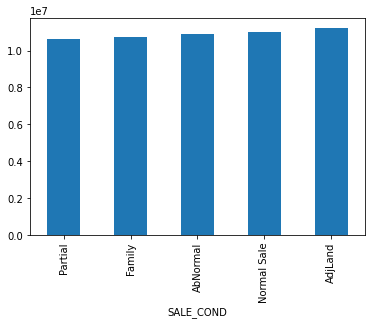

In [51]:
hp.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values().plot.bar()

In [52]:
hp['SALE_COND']=hp['SALE_COND'].replace({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})

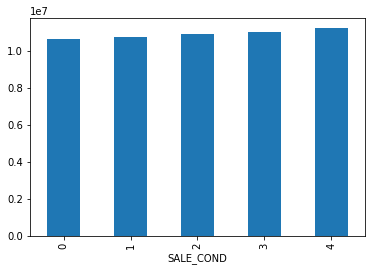

In [53]:
hp.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values().plot.bar()

In [54]:
hp.SALE_COND.isnull().sum()

0

In [55]:
hp.SALE_COND.dtype   

dtype('int64')

# **PARK_FACIL**

In [56]:
hp.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [57]:
hp.PARK_FACIL.isnull().sum()

0

In [58]:
hp['PARK_FACIL']=hp['PARK_FACIL'].replace({'Yes':1,'No':0,'Noo':0})

In [ ]:
hp.info()

# **DATE_BUILD**

In [60]:
hp.DATE_BUILD.value_counts()

02-07-1987    6
04-04-1999    5
27-08-2000    4
13-05-1982    4
08-04-1989    4
             ..
24-07-1970    1
12-02-1998    1
04-11-1977    1
21-04-1986    1
24-07-1961    1
Name: DATE_BUILD, Length: 5808, dtype: int64

In [61]:
hp.DATE_BUILD=pd.to_datetime(hp.DATE_BUILD)

In [62]:
hp.DATE_BUILD.dtype

dtype('<M8[ns]')

In [63]:
hp['BUILD_YEAR']=pd.DatetimeIndex(hp['DATE_BUILD']).year

In [64]:
hp['AGE']=hp['SALE_YEAR']-hp['BUILD_YEAR']

# AGE

In [65]:
hp.AGE.values

array([44, 11, 20, ..., 28, 32, 44])

In [66]:
hp.AGE.isnull().sum()

0

In [67]:
hp.AGE.describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: AGE, dtype: float64

# **BUILDTYPE**

In [68]:
hp.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [69]:
hp.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [70]:
hp['BUILDTYPE']=hp['BUILDTYPE'].replace({'Comercial':'Commercial','Others':'Other'})

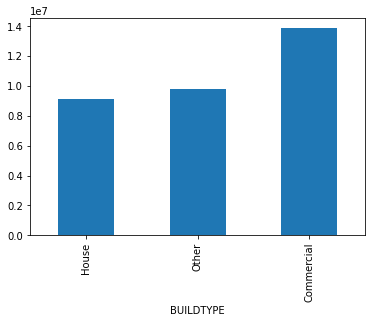

In [71]:
hp.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values().plot.bar()

In [72]:
hp=pd.get_dummies(hp,columns=['BUILDTYPE'])

# **UTILITY_AVAIL**

In [73]:
hp.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [74]:
hp.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [75]:
hp['UTILITY_AVAIL']=hp['UTILITY_AVAIL'].replace({'All Pub':'AllPub'})

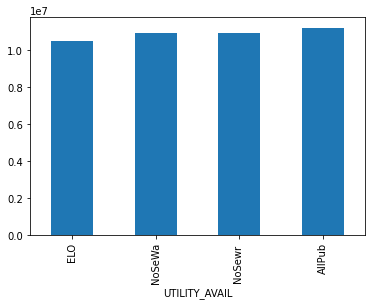

In [76]:
hp.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values().plot.bar()

In [77]:
hp=pd.get_dummies(hp,columns=['UTILITY_AVAIL'])

In [ ]:
hp.info()

# **STREET** 

In [ ]:
hp.STREET.value_counts()

In [83]:
hp.STREET.unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [82]:
hp['STREET']=hp['STREET'].replace({'Pavd':'Paved','No Access':'NoAccess'})

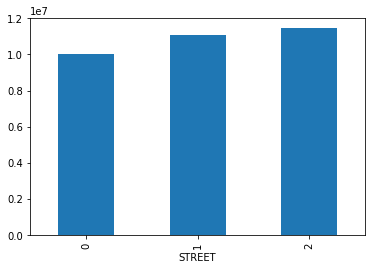

In [88]:
hp.groupby('STREET')['SALES_PRICE'].mean().sort_values().plot.bar()

In [87]:
hp['STREET']=hp['STREET'].replace({'NoAccess':0,'Paved':1,'Gravel':2})

# **MZZONE**

In [94]:
hp.MZZONE.values

array(['A', 'RH', 'RL', ..., 'I', 'RL', 'I'], dtype=object)

In [98]:
hp.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

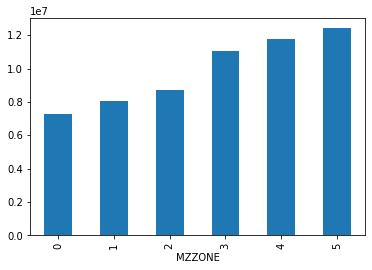

In [102]:
hp.groupby('MZZONE')['SALES_PRICE'].mean().sort_values().plot.bar()

In [101]:
hp['MZZONE']=hp['MZZONE'].replace({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})

In [ ]:
hp.MZZONE.isnull().sum()

In [ ]:
hp.MZZONE.dtype

# fill null **values**

In [ ]:
hp.QS_OVERALL.isnull().sum()

In [120]:
hp.QS_OVERALL.values

array([4.33 , 3.765, 3.09 , ..., 3.84 , 4.16 , 3.64 ])

In [115]:
c=hp.QS_OVERALL.mean()
hp.QS_OVERALL.fillna(int(c),inplace=True)

# Data type **change**

In [145]:
hp=hp.astype({'N_BEDROOM':int,'N_BATHROOM':int,'QS_OVERALL':int,'QS_BEDROOM':int,'QS_BATHROOM':int,'QS_ROOMS':int})

In [124]:
hp=hp.drop(columns=['BUILD_YEAR','SALE_YEAR','DATE_SALE','DATE_BUILD'])

In [ ]:
hp.info()

In [ ]:
hp.isnull().sum()

# data **cleaned**

# split **data**

In [203]:
X = hp.drop(['SALES_PRICE'],axis=1)
y = hp['SALES_PRICE']

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Decisiontree **regressor**

In [206]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train) 
y_pred = dt.predict(X_test)
y_pred

array([ 9468300., 11060050.,  5412500., ..., 14292780., 12946530.,
        7497100.])

In [207]:
from sklearn import metrics
r2=metrics.r2_score(y_test,y_pred)
print('Decisiontree Modal r2_score',round(r2,2))

Decisiontree Modal r2_score 0.97


# Linear **Regressor**

In [217]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([ 8614932.75776854,  9038006.28606592,  5801093.76151499, ...,
       14084661.97736348, 12764590.69230185,  6343061.14680294])

In [218]:
from sklearn import metrics
r2=metrics.r2_score(y_test,y_pred_lr)
print("Linear Regressor r2_score",round(r2,2))

Linear Regressor r2_score 0.92


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression
model.fit(x_train,y_train)

TypeError: ignored